# 프로젝트 1 : Image Classification
## 1. VGG16 모델
VGG16 모델의 Image Classification task에서 자주 사용하는 대표적인 모델입니다.  
- 논문: Very Deep Convolutional Networks for Large-Scale Image Recognition  
- VGG16 모델의 구조  
![VGG16 모델의 구조](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu10_VGG16_MoDel_GuJo.max-800x600.png)

## 2. 코드 살펴보기
VGG16 모델의 구조를 파악하셨나요? 파악한 VGG16 모델을 코드로 구현해 보는 것이 첫 번째 프로젝트입니다. 프로젝트는 크게 2개의 문제로 구성되어 있습니다.  

- 문제 1-1. VGG16 모델 구현하기  
영상의 내용을 참고하여 직접 코드로 모델을 구현해 보세요. Batch Normalization, Parameter Initialization 등을 사용할 수도 있습니다.

- 문제 1-2. 다양한 방법을 사용하여 모델의 성능 올리기  
skip connection, pre-trained model 등 다양한 방법을 사용하여 기본적인 VGG16 모델의 성능보다 높은 정확도를 구해보세요.  

먼저 필요한 라이브러리를 불러옵니다.

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

데이터를 준비합니다.   
불러온 데이터는 캐글에서 제공되는 개와 고양이의 데이터로, 이번 프로젝트에서 우리는 개와 고양이를 분류할 예정입니다.   
test 데이터에서 1은 개, 0은 고양이를 의미합니다.  

여러분들이 원하는 이미지 데이터를 불러 Classification을 해보는 것도 좋을 것 같군요. 😊

In [7]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

> - path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True):   
> tf.keras.utils.get_file 함수를 사용하여 지정된 URL에서 파일을 다운로드하고 지정된 이름으로 저장합니다.   
> 이 함수는 파일의 경로를 반환하며, extract=True로 설정되어 있어 압축 파일이 있다면 자동으로 압축을 해제합니다.   
> 이 경우, 다운로드한 파일은 'cats_and_dogs.zip'로 저장됩니다.

> - path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered'):  
> 압축이 해제된 디렉토리 경로를 생성합니다.
> os.path.dirname(path_to_zip)은 다운로드한 ZIP 파일의 디렉토리 경로를 반환하고, 이를 기반으로 'cats_and_dogs_filtered'라는 하위 디렉토리를 생성합니다.  
최종적으로 path 변수에는 압축이 해제된 데이터셋의 디렉토리 경로가 저장됩니다.

train 데이터와 validation 데이터에서 개와 고양이 이미지가 저장된 경로를 각각 변수에 저장해 둡니다.

In [8]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/Users/yangh/.keras/datasets/cats_and_dogs_filtered/train
/Users/yangh/.keras/datasets/cats_and_dogs_filtered/validation


In [9]:
# directory with our training cat picture
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# directory with our training dog picture
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/Users/yangh/.keras/datasets/cats_and_dogs_filtered/train/cats
/Users/yangh/.keras/datasets/cats_and_dogs_filtered/train/dogs
/Users/yangh/.keras/datasets/cats_and_dogs_filtered/validation/cats
/Users/yangh/.keras/datasets/cats_and_dogs_filtered/validation/dogs


train 데이터와 validation 데이터의 개수를 알아봅시다.

In [10]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


필요한 파라미터를 설정해 줍시다. 파라미터를 수정하면 성능을 높일 수 있으니 다양한 실험을 해보세요.

In [15]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

이미지를 확인하기 위해 데이터를 시각화하는 함수를 만들어 봅시다.   
간단한 함수이기 때문에 자세한 코드 설명은 생략하겠습니다. 궁금하다면 구글링을 통해 각 코드가 어떤 역할을 하는지 찾아보세요.

In [11]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

train 데이터가 2천장 밖에 되지 않기 때문에 Data Augmentation(데이터 증강)을 통해 데이터의 수를 늘립니다.  

Data Augmentation은 Rescale, Rotation, Random Crop, Zoom, Flip 등 다양한 기법을 사용하여 데이터의 양을 증가시키는 것입니다.   
range의 숫자를 변화시키거나 Flip에서 True/False를 적절하게 사용하여 다양한 실험을 해보세요.

In [12]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=0.3,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=False)

.flow_from_directory를 사용하여 파이프라인을 만들어 directory와 작업 환경을 연결시켜 줍니다.   
우리는 개와 고양이를 분류하는 task를 수행하기 때문에 class_mode는 'binary'입니다. Classification task에 따라 class_mode를 변경하시면 됩니다.

In [16]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


Data Augmentation이 제대로 되었는지 확인해 봅시다.

In [16]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDep

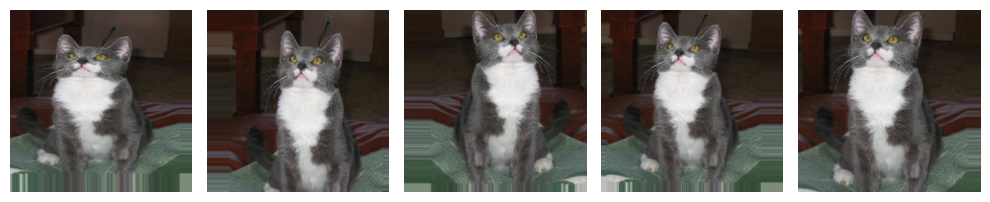

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

> - train_data_gen[0][0][0] : 첫 번째 배치에서, 첫번째 이미지 데이터 배열의, 첫번째 이미지
> - for i in range(5) 으로 5번 반복되므로 총 5개의 이미지가 선택됨  
> 첫번째 이미지를 증강한 (좌우 반전, 확대, 이동 등) 이미지들을 옆에 4개 나열해줌
> - train_data_gen[0][0] : 1개의 배치 안에 있는 이미지들 (여기의 예로는 batch_size=20이니까) 20개(서로 다른 이미지)가 나옴

Validation 데이터에도 train 데이터와 같은 동일한 작업을 해 줍니다.   
그러나 Validation 데이터는 classification이 잘 되는지 평가하는 용도로 사용되기 때문에 데이터의 스케일만 변경해 줍니다.

In [17]:
# validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [18]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=validation_dir,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


Validation 데이터를 확인해 봅시다. 크게 이미지와 정답 데이터로 구성이 되어 있습니다.

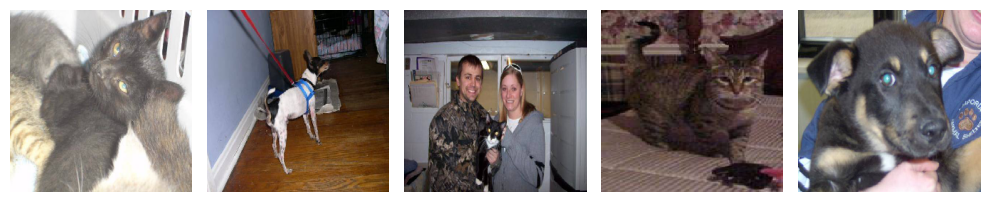

In [20]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

> - next 함수를 사용하여 다음 배치의 데이터를 가져옵니다.
> - sample_training_images, _:   
> next 함수의 반환값은 튜플이며, 여기서는 첫 번째 요소만 사용합니다. sample_training_images는 가져온 배치에 포함된 이미지 데이터를 나타냅니다.   
> 두 번째 요소 _는 레이블 데이터로 사용되지 않습니다.

In [15]:
_[:5]   # 정답 데이터

array([0., 0., 1., 0., 1.], dtype=float32)

---
## 문제 1-1. VGG16 모델 구현하기
이제 VGG16 모델을 구현해 볼 시간입니다. 바로 혼자서 모델을 구현하라고 하면 어렵겠죠? 그래서 참고할만한 모델 구현 코드를 아래에 적어 보았습니다.   
실제 VGG16 모델과는 살짝 구조가 다르기 때문에 이미지를 보면서 어느 부분이 다른치 찾아 보는 것도 좋을 것 같습니다.

<!-- # 참고 코드

input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary() -->

In [16]:
# # 참고 코드

# input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
# x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
# x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)

# x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)

# x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.MaxPool2D((2, 2))(x)

# x=tf.keras.layers.Flatten()(x)
# x=tf.keras.layers.Dense(1024, activation='relu')(x)
# x=tf.keras.layers.Dense(512, activation='relu')(x)
# out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

# model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
# model.summary()

VGG16 모델의 구조를 다시 상기해 보고, 위의 코드를 참고하여 VGG16 모델을 직접 구현해 보세요.

![VGG16 모델의 구조](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu10_VGG16_MoDel_GuJo.max-800x600.png)

In [17]:
# 문제1-1. 이미지에 나온 VGG16 모델을 구현하세요.
from tensorflow.keras.layers import MaxPooling2D

input_layer = tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.MaxPooling2D(2, 2)(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.MaxPooling2D(2, 2)(x)

x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.MaxPooling2D(2, 2)(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.MaxPooling2D(2, 2)(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.MaxPooling2D(2, 2)(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dense(1000, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                             

손실함수, optimizer, metric을 설정해 줍니다.  
손실함수와 metric은 분류 task에 따라 다양하게 바꿀 수 있습니다. optimizer도 Adam 외에 다양한 것을 사용할 수 있습니다. 자유롭게 바꿔보세요.

In [21]:
# 모델 저장하기
model.save('VGG16_cats_dogs_classification.h5')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


---
텐서플로우 2.x 버전에서 권장되는 tf.saved_model API를 활용하여 모델을 저장.    
모델의 구조, 가중치, 옵티마이저 상태 및 그래프 실행에 필요한 모든 정보를 포함한다.  
- 모델 저장 : tf.saved_model.save(model, path_to_dir)
- 모델 로드 : model = tf.saved_model.load(path_to_dir)  
[텐서플로우 공식문서 참조](https://www.tensorflow.org/guide/saved_model?hl=ko)   
saved_model API를 시도해보았으나 시간 부족으로 노드에서 배운 방식으로 모델 저장하기로 함.

In [23]:
tf.saved_model.save(model, path)

INFO:tensorflow:Assets written to: /Users/yangh/.keras/datasets/cats_and_dogs_filtered/assets


INFO:tensorflow:Assets written to: /Users/yangh/.keras/datasets/cats_and_dogs_filtered/assets


In [28]:
loaded_model = tf.saved_model.load(path)
tf.keras.utils.plot_model(loaded_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

AttributeError: '_UserObject' object has no attribute 'built'

---

In [34]:
# 모델 컴파일
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
             optimizer=optimize,
             metrics=[metric])

callbacks_list = [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]

모델 학습을 시켜봅시다.  
data generator는 입력 데이터와 타겟(라벨)의 batch를 끝없이 반환합니다.  
batch가 끝없이 생성되기 때문에, 한 번의 epoch에 generator로부터 얼마나 많은 샘플을 뽑을지 모델에 전달해야 합니다.  
만약 batch_size=20이고 steps_per_epoch=100일 경우 (데이터, 라벨)의 쌍 20개가 생성되고, 크기가 20인 batch 데이터를 100번 학습하면 1 epoch이 완료됩니다.   
단, 크기 20의 batch 데이터는 매번 랜덤으로 생성됩니다.  

일반적으로 (전체 데이터 길이/batch_size)를 steps_per_epoch으로 설정합니다.

In [38]:
# 모델 학습
histroy = model.fit(
    train_data_gen,
    steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) / batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    callbacks=callbacks_list,
    validation_freq=1)

Epoch 1/5
125/125 [==============================] - 753s 6s/step - loss: 1.2310 - binary_accuracy: 0.5000 - val_loss: 0.7176 - val_binary_accuracy: 0.5000
Epoch 2/5
125/125 [==============================] - 723s 6s/step - loss: 0.6953 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 723s 6s/step - loss: 0.6920 - binary_accuracy: 0.5000 - val_loss: 0.7008 - val_binary_accuracy: 0.5000
Epoch 4/5
125/125 [==============================] - 722s 6s/step - loss: 0.6941 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 5/5
125/125 [==============================] - 714s 6s/step - loss: 0.6935 - binary_accuracy: 0.5000 - val_loss: 0.6939 - val_binary_accuracy: 0.5000


학습이 되었다면 시각화를 통해 정확도를 알아봅시다.
- 모델 학습의 변수를 histroy로 잘못 설정하여 이번만 histroy로 확인함.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDep

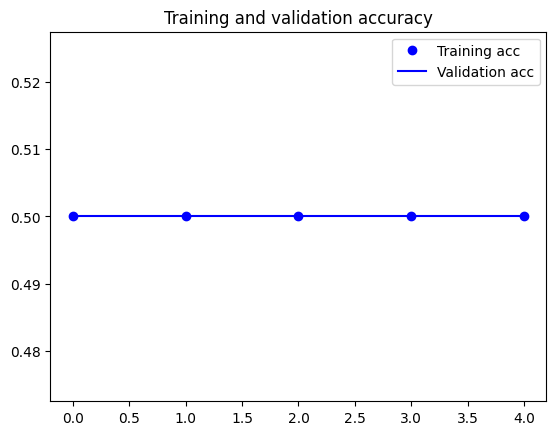

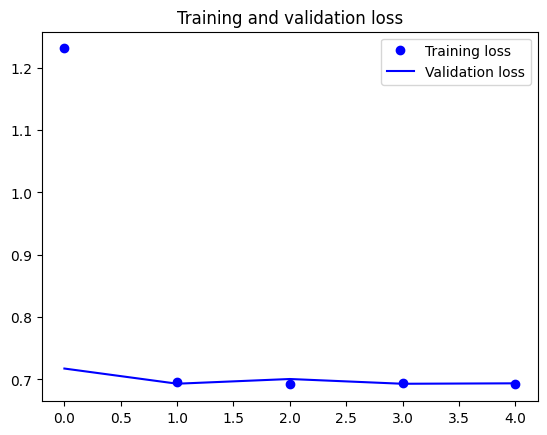

In [39]:
acc = histroy.history['binary_accuracy']
val_acc = histroy.history['val_binary_accuracy']
loss = histroy.history['loss']
val_loss = histroy.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

성능이 그리 좋지는 않습니다.  

- accuracy와 loss의 train, validation 트렌드는 유사한 편이나,
    - loss 값이 0인 것으로 보아 과적합 가능성이 보임 -> 학습률 0.001로 조정해보기
    - 수치 자체가 좋지 않음 -> 모델 성능 개선 필요 -> pre-trainde model 활용해보기

In [40]:
# 모델 삭제 - 메모리 관리를 위해
del model

## 문제 1-2. 다양한 방법을 사용하여 모델의 성능 올리기
hyperparameter 변경, 모델 수정, optimizer 변경, skip connection, pre-trained model 등 다양한 방법을 사용하면 모델의 성능을 높일 수 있습니다.   
다양한 실험을 통해 성능을 올려 보세요.

In [ ]:
# 모델 로드하여 가져오기
from tensorflow.keras.models import load_model

loaded_model = load_model('VGG16_cats_dogs_classification.h5')
loaded_model.summary()

In [19]:
# 문제 1-2. hyperparameter 설정
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

Found 2000 images belonging to 2 classes.
(16, 256, 256, 3)


/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDep

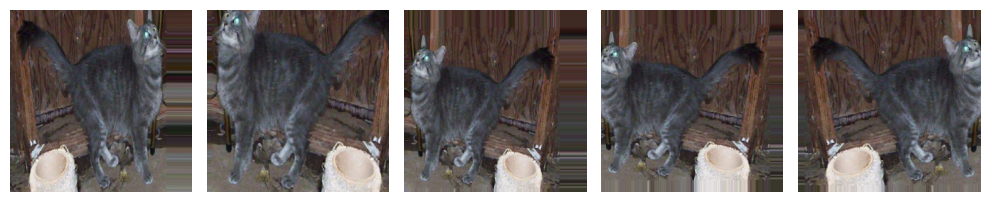

None
Found 1000 images belonging to 2 classes.


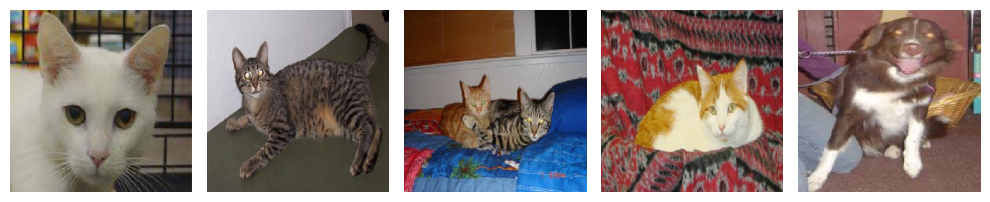

None


In [20]:
# 문제 1-2. 데이터 generator 생성
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

print(train_data_gen[0][0].shape)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
print(plotImages(augmented_images))

# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

sample_training_images, _ = next(val_data_gen)
print(plotImages(sample_training_images[:5]))

In [21]:
# 문제 1-2. 모델 구현 - pretrained model 활용
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

# VGG16 모델 로드 (weights는 ImageNet 데이터셋으로 사전 훈련된 가중치 사용)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# 출력에 가까운 층 선택 (여기서는 마지막 Conv2D 층으로 선택)
output_layer = base_model.get_layer('block5_conv3').output

# 새로운 fully connected layer 추가
x = layers.Flatten()(output_layer)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(1000, activation='relu')(x)
out_layer = layers.Dense(1, activation='sigmoid')(x)

# 모델 정의
model = models.Model(inputs=base_model.input, outputs=out_layer)

# VGG16의 일부 층은 동결되어야 함
for layer in base_model.layers:
    layer.trainable = False

# 모델 요약 확인
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [22]:
# 모델 저장하기
model.save('VGG16_cats_dogs_classification_ver2.h5')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
# 문제 1-2. loss function, optimizer, metric 설정 및 모델 컴파일
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
             optimizer=optimize,
             metrics=[metric])

callbacks_list = [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]

In [ ]:
# CSVLogger로 에폭마다 훈련 기록 저장
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger(filename=LOGFILE_PATH, append = True)

In [ ]:
# 모델 학습
history = model.fit(
    train_data_gen,
    steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) / batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    callbacks=callbacks_list,
    validation_freq=1)

Epoch 1/5
125/125 [==============================] - ETA: 0s - loss: 971.9745 - binary_accuracy: 0.5980

- 커널 연결 끊김 현상으로 맨 처음 생성했던 모델을 재실행하여 저장하고 삭제한 후 모델의 성능 올리기를 시도함   
- 모델 저장 -> 삭제 후 다시 시도했으나 계속 아래와 같이 커널 연결이 끊김.  
Kernel Restarting  
The kernel for Documents/Aiffel_dl/dl_cv/project_10.ipynb appears to have died. It will restart automatically.

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# histroy를 CSV파일에 저장해두기

import csv
import pandas as pd

# 히스토리를 CSV 파일로 저장
csv_file_path = 'training_history.csv'

with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # CSV 파일 헤더 작성
    header = ['epoch', 'loss', 'accuracy', 'val_loss', 'val_accuracy']
    csv_writer.writerow(header)
    
    # 각 에포크별 지표 작성
    for epoch in range(1, len(history.history['loss']) + 1):
        row = [epoch,
               history.history['loss'][epoch - 1],
               history.history['accuracy'][epoch - 1],
               history.history['val_loss'][epoch - 1],
               history.history['val_accuracy'][epoch - 1]]
        csv_writer.writerow(row)

# CSV 파일을 pandas DataFrame으로 읽어오기 (선택 사항)
df = pd.read_csv(csv_file_path)
print(df)